In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

1.3.4
2.6.3


In [4]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter)
from dike_model_function import DikeNetwork  # @UnresolvedImport


def sum_over(*args):
    return sum(args)

In [5]:
from ema_workbench import (Model, MultiprocessingEvaluator, Policy, Scenario)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation


ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-5
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [6]:
#enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
CategoricalParameter('A.1_Brate', [0, 1, 2])
CategoricalParameter('A.2_Brate', [0, 1, 2])
CategoricalParameter('A.3_Brate', [0, 1, 2])
CategoricalParameter('A.4_Brate', [0, 1, 2])
CategoricalParameter('A.5_Brate', [0, 1, 2])


In [7]:
#enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

In [8]:
#enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage 0', 'A.1_Expected Annual Damage 1', 'A.1_Expected Annual Damage 2', 'A.1_Dike Investment Costs 0', 'A.1_Dike Investment Costs 1', 'A.1_Dike Investment Costs 2'), function=<function sum_over at 0x0000016A55479820>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths 0', 'A.1_Expected Number of Deaths 1', 'A.1_Expected Number of Deaths 2'), function=<function sum_over at 0x0000016A55479820>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage 0', 'A.2_Expected Annual Damage 1', 'A.2_Expected Annual Damage 2', 'A.2_Dike Investment Costs 0', 'A.2_Dike Investment Costs 1', 'A.2_Dike Investment Costs 2'), function=<function sum_over at 0x0000016A55479820>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths 0', 'A.2_Expected Number of Deaths 1', 'A.2_Expected Number of Deaths 2'), function=<function sum_over at 0

In [9]:
#running the model through EMA workbench
from ema_workbench import (MultiprocessingEvaluator, ema_logging,
                           perform_experiments, SequentialEvaluator)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with SequentialEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=5, policies=2)

[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [05:22<00:00,  1.61s/it]
[MainProcess/INFO] experiments finished


In [10]:
#observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,20,305.185989,1.5,0.764179,250.002467,1.0,0.348958,43.006707,1.5,0.792691,...,6,0,2,8,0,7,0,4,0,dikesnet
1,100,182.944734,1.0,0.945921,184.821857,1.0,0.509084,103.735820,1.0,0.868453,...,6,0,2,8,0,7,0,5,0,dikesnet
2,89,248.722105,10,0.835768,33.434111,1.5,0.291667,255.630023,1.0,0.267496,...,6,0,2,8,0,7,0,6,0,dikesnet
3,15,152.234675,1.5,0.241142,244.296047,10,0.624020,184.008649,10,0.433651,...,6,0,2,8,0,7,0,7,0,dikesnet
4,53,273.193303,10,0.305871,213.368096,1.0,0.575712,322.769766,1.0,0.308117,...,6,0,2,8,0,7,0,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,63,205.771113,10,0.268767,305.483302,1.5,0.460548,343.600266,1.0,0.501868,...,10,4,1,1,4,4,1,49,3,dikesnet
196,122,92.329621,1.5,0.063900,177.494269,1.5,0.520109,127.314085,1.5,0.806663,...,10,4,1,1,4,4,1,50,3,dikesnet
197,83,256.031529,1.0,0.101962,91.098149,1.5,0.160254,296.854203,1.5,0.088282,...,10,4,1,1,4,4,1,51,3,dikesnet
198,16,129.388821,1.5,0.799833,50.767160,1.0,0.216814,88.152567,1.5,0.579962,...,10,4,1,1,4,4,1,52,3,dikesnet


In [11]:
outcomes

{'A.1 Total Costs': array([1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 1.12454989e+08, 1.12454989e+08,
        1.12454989e+08, 1.12454989e+08, 2.13370981e+08, 2.13370981e+08,
        2.13370981e+08, 2.13370981e+08, 2.133

In [33]:
uncer = experiments.iloc[:,0:19]
uncer

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,20,305.185989,1.5,0.764179,250.002467,1.0,0.348958,43.006707,1.5,0.792691,262.789778,1.0,0.999288,40.011350,1.5,0.743530,4.5,2.5,2.5
1,100,182.944734,1.0,0.945921,184.821857,1.0,0.509084,103.735820,1.0,0.868453,179.256516,10,0.198969,167.573503,1.5,0.782737,1.5,1.5,3.5
2,89,248.722105,10,0.835768,33.434111,1.5,0.291667,255.630023,1.0,0.267496,151.561074,10,0.627084,281.673488,1.5,0.711071,2.5,1.5,1.5
3,15,152.234675,1.5,0.241142,244.296047,10,0.624020,184.008649,10,0.433651,318.522194,1.5,0.918109,150.991532,1.0,0.622998,2.5,1.5,3.5
4,53,273.193303,10,0.305871,213.368096,1.0,0.575712,322.769766,1.0,0.308117,140.202951,1.5,0.648442,262.552844,10,0.999168,1.5,2.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,63,205.771113,10,0.268767,305.483302,1.5,0.460548,343.600266,1.0,0.501868,259.647031,1.0,0.386022,141.757313,1.5,0.523491,4.5,4.5,3.5
196,122,92.329621,1.5,0.063900,177.494269,1.5,0.520109,127.314085,1.5,0.806663,87.998319,1.5,0.109794,345.871294,1.5,0.857661,1.5,4.5,3.5
197,83,256.031529,1.0,0.101962,91.098149,1.5,0.160254,296.854203,1.5,0.088282,294.495586,1.0,0.091533,96.735265,10,0.911400,4.5,4.5,3.5
198,16,129.388821,1.5,0.799833,50.767160,1.0,0.216814,88.152567,1.5,0.579962,105.401828,10,0.285740,247.392235,1.0,0.667717,2.5,1.5,4.5


In [35]:
lev = experiments.iloc[:,20:]
lev

,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,policy,model
0,1,1,1,0,1,0,1,1,1,1,...,4,6,0,2,8,0,7,0,0,dikesnet
1,1,1,1,0,1,0,1,1,1,1,...,4,6,0,2,8,0,7,0,0,dikesnet
2,1,1,1,0,1,0,1,1,1,1,...,4,6,0,2,8,0,7,0,0,dikesnet
3,1,1,1,0,1,0,1,1,1,1,...,4,6,0,2,8,0,7,0,0,dikesnet
4,1,1,1,0,1,0,1,1,1,1,...,4,6,0,2,8,0,7,0,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,0,1,1,1,0,1,0,0,...,10,10,4,1,1,4,4,1,3,dikesnet
196,0,1,0,1,1,1,0,1,0,0,...,10,10,4,1,1,4,4,1,3,dikesnet
197,0,1,0,1,1,1,0,1,0,0,...,10,10,4,1,1,4,4,1,3,dikesnet
198,0,1,0,1,1,1,0,1,0,0,...,10,10,4,1,1,4,4,1,3,dikesnet


In [12]:
#defining specific policies
#for example, policy 1 is about extra protection in upper boundary
#policy 2 is about extra protection in lower boundary
#policy 3 is extra protection in random locations
from ema_workbench import Policy

policies = [Policy('policy 1', **{'0_RfR 0':1,
                                  '0_RfR 1':1,
                                  '0_RfR 2':1,
                                  'A.1_DikeIncrease 0':5}),
           Policy('policy 2', **{'4_RfR 0':1,
                                  '4_RfR 1':1,
                                  '4_RfR 2':1,
                                  'A.5_DikeIncrease 0':5}),
           Policy('policy 3', **{'1_RfR 0':1,
                                  '2_RfR 1':1,
                                  '3_RfR 2':1,
                                  'A.3_DikeIncrease 0':5})]

#pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios,
                                            policies)

print(results)

In [13]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes["A.1 Total Costs"] < 2.5e+08
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 200 points remaining, containing 146 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.66, coverage: 0.9041095890410958, density: 1.0 restricted_dimensions: 2


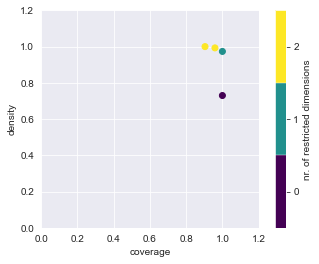

In [14]:
box1.show_tradeoff()
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category


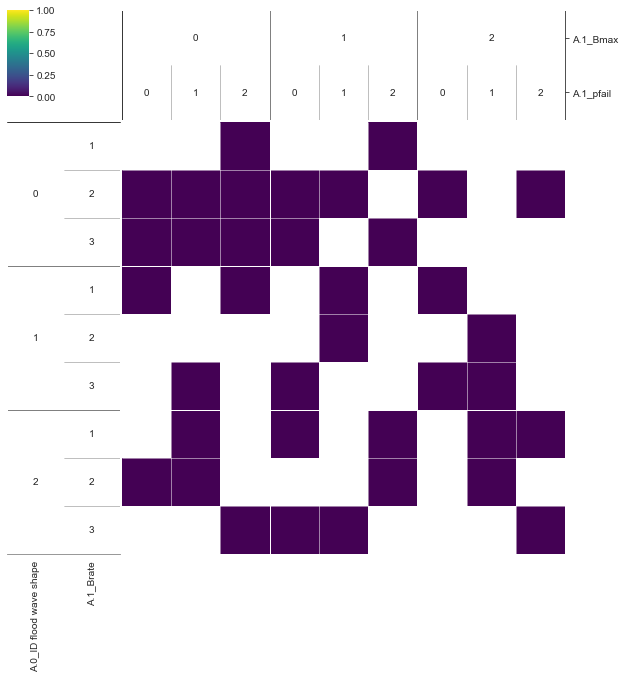

In [17]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes["A.2 Total Costs"] < 1
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


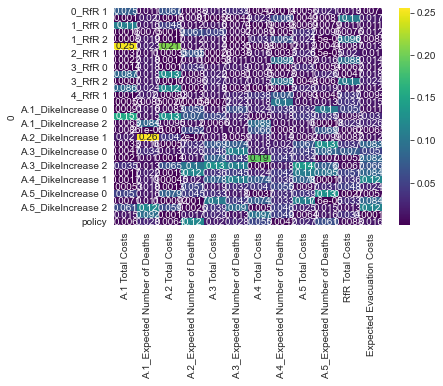

In [36]:
from ema_workbench.analysis import feature_scoring

x = lev
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

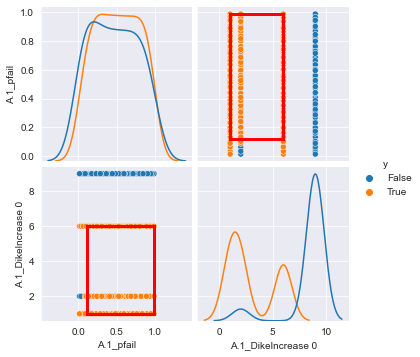

In [26]:
box1.select(3)
fig = box1.show_pairs_scatter()
#fig.set_size_inches((12,12)) #this creates an error
plt.show()